In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def sample_to_7dsignature(*args):
    """
    Takes a CSV file name (without extension) having samples of device as input.
    The column names must be as : V1,C1,A1,PF1,AP1,RP1,F1,T
    Converts it to a dataset of signatures of duration 1 min.
    Exports the modified CSV in seconds frequency, and signature format in separate files as: 
        1. (filename_seconds.csv) 
        2. (filename_7d.npy).
        3. 7D numpy array
        4. labels
    Returns 1. the 7-D signature of device, and the 2. appropriate labels in a pandas series format. 
    
    """
    import csv
    import numpy as np
    import pandas as pd
    
    devices = []
    for x in args:
        devices.append(x)
    for fn in devices:
        df = pd.read_csv(f'{fn}.csv')
        df['T'] = pd.DatetimeIndex(df['T'],tz = 'Asia/Kolkata')
        df = df.set_index('T')
        df.resample('S').mean()
        df.to_csv(f'{fn}_seconds.csv',index= False)

    
        with open(f'{fn}_seconds.csv', 'r') as fp:
            next(fp) # ignore column names
            np_v  =np.array([])
            np_c  =np.array([])
            np_a  =np.array([])
            np_pf =np.array([])
            np_ap =np.array([])
            np_rp =np.array([])
            np_f  =np.array([])
            params = [np_v,np_c,np_a,np_pf,np_ap,np_rp,np_f]  

            for i, line in enumerate(fp):
                line  = line[:-2]  #remove \n from end of string.
                line = np.array(line.split(sep = ','))  # array of string values
                line = line.astype(np.float)    # array of float values v,c,a,pf,ap,rp,f
    #             print(line) 
    #             print(line.size)  7
    #             print(line.shape) 7,
                for idx, val in enumerate(line):
                    #i will give us the parameter name ,  x will give us the parameter value
                # not able to reduce code due to some issue with numpy array not being updated
                    if idx == 0:
                        np_v = np.append(np_v,val)
                    elif idx==1:
                        np_c = np.append(np_c,val)
                    elif idx==2:
                        np_a = np.append(np_a,val)
                    elif idx==3:
                        np_pf = np.append(np_pf,val)
                    elif idx==4:
                        np_ap = np.append(np_ap,val)
                    elif idx==5:
                        np_rp = np.append(np_rp,val)
                    elif idx==6:
                        np_f = np.append(np_f,val) # append values to corresponding arrays 
    #         print(np_v,np_c,np_a,np_pf,np_ap,np_rp,np_f)  #correct
    #         print(np_v.size) #5559



            extra_samples = (np_v.size)%60  # a signature is of length 60, thus delete extra samples
    #         print(np_v.shape) (5559,)

            if extra_samples !=0:
                np_v = np.delete(np_v,np.s_[-extra_samples:])
                np_c = np.delete(np_c,np.s_[-extra_samples:])
                np_a = np.delete(np_a,np.s_[-extra_samples:])
                np_pf = np.delete(np_pf,np.s_[-extra_samples:])
                np_ap = np.delete(np_ap,np.s_[-extra_samples:])
                np_rp = np.delete(np_rp,np.s_[-extra_samples:])
                np_f = np.delete(np_f,np.s_[-extra_samples:])



            samples = np_v.size
            no_signatures = samples//60  # no of signatures per device collected

            np_v = np_v.reshape((no_signatures),60)  #convert samples to a stream of 1 minute
            np_c = np_c.reshape((no_signatures),60)
            np_a = np_a.reshape((no_signatures),60)
            np_pf = np_pf.reshape((no_signatures),60)
            np_ap = np_ap.reshape((no_signatures),60)
            np_rp = np_rp.reshape((no_signatures),60)
            np_f = np_f.reshape((no_signatures),60)
    #         print(np_v.shape)  (92, 60)


            li = [] #this will hold all the signatures of a device 
    #         print(no_signatures)  #92
            for x in range(no_signatures):
                # signature_array will be 7 dimensional array with a length of 1 row x 60 columns
                signature_array = np.array([
                                            [np_v[x]],
                                            [np_c[x]],
                                            [np_a[x]],
                                            [np_pf[x]],
                                            [np_ap[x]],
                                            [np_rp[x]],
                                            [np_f[x]],
                                          ])
    #             print(signature_array.shape)  #(7, 1, 60)
                li.append(signature_array)
            li = np.array(li)
    #         print(li.shape) #(92, 7, 1, 60)
            no_rows = li.shape[0]
    #         print(no_rows) #92
            label_series = pd.Series([],dtype='string')
            for x in range (no_rows):
                label_series[x] = fn
            np.save(f'{fn}',li)
            label_series.to_csv(f'{fn}_labels.csv',index=False)
    return 

In [198]:
zf = pd.read_csv('vf.csv')

In [199]:
zf = zf.drop('ID',axis =1)

In [200]:
zf

,V1,C1,A1,PF1,AP1,RP1,F1,T
0,279.83,2.05,-359,-0.62,576.24,450.75,49.96,2020-9-15 23:50:56.208
1,280.09,2.05,-359,-0.62,575.32,449.57,49.96,2020-9-15 23:50:57.334
2,280.40,2.06,-359,-0.62,579.03,454.31,49.96,2020-9-15 23:50:58.465
3,282.61,0.58,-126,-0.77,164.06,105.07,49.96,2020-9-15 23:51:0.589
4,280.79,0.58,-126,-0.77,164.49,105.74,49.97,2020-9-15 23:51:1.722
...,...,...,...,...,...,...,...,...
12188,278.26,0.42,-57,-0.48,118.75,104.18,49.90,2020-9-16 4:7:44.14
12189,278.61,1.96,-294,-0.54,546.47,460.64,49.89,2020-9-16 4:7:45.140
12190,277.39,1.94,-290,-0.54,541.04,456.76,49.90,2020-9-16 4:7:46.263
12191,278.77,1.95,-291,-0.53,544.94,460.74,49.89,2020-9-16 4:7:48.393


In [201]:
zf['T'] = pd.DatetimeIndex(zf['T'],tz = 'Asia/Kolkata')
zf = zf.set_index('T')
zf.resample('S').mean()
fn = 'vf'
zf.to_csv(f'{fn}_seconds.csv',index= False)

    
with open(f'{fn}_seconds.csv', 'r') as fp:
    next(fp) # ignore column names
    np_v  =np.array([])
    np_c  =np.array([])
    np_a  =np.array([])
    np_pf =np.array([])
    np_ap =np.array([])
    np_rp =np.array([])
    np_f  =np.array([])
    params = [np_v,np_c,np_a,np_pf,np_ap,np_rp,np_f]  

    for i, line in enumerate(fp):
        line  = line[:-2]  #remove \n from end of string.
        line = np.array(line.split(sep = ','))  # array of string values
        line = line.astype(np.float)    # array of float values v,c,a,pf,ap,rp,f
#             print(line) 
#             print(line.size)  7
#             print(line.shape) 7,
        for idx, val in enumerate(line):
                #i will give us the parameter name ,  x will give us the parameter value
            # not able to reduce code due to some issue with numpy array not being updated
            if idx == 0:
                np_v = np.append(np_v,val)
            elif idx==1:
                np_c = np.append(np_c,val)
            elif idx==2:
                np_a = np.append(np_a,val)
            elif idx==3:
                np_pf = np.append(np_pf,val)
            elif idx==4:
                np_ap = np.append(np_ap,val)
            elif idx==5:
                np_rp = np.append(np_rp,val)
            elif idx==6:
                np_f = np.append(np_f,val) # append values to corresponding arrays 
#         print(np_v,np_c,np_a,np_pf,np_ap,np_rp,np_f)  #correct
#         print(np_v.size) #5559



    extra_samples = (np_v.size)%60  # a signature is of length 60, thus delete extra samples
#         print(np_v.shape) (5559,)

    if extra_samples !=0:
        np_v = np.delete(np_v,np.s_[-extra_samples:])
        np_c = np.delete(np_c,np.s_[-extra_samples:])
        np_a = np.delete(np_a,np.s_[-extra_samples:])
        np_pf = np.delete(np_pf,np.s_[-extra_samples:])
        np_ap = np.delete(np_ap,np.s_[-extra_samples:])
        np_rp = np.delete(np_rp,np.s_[-extra_samples:])
        np_f = np.delete(np_f,np.s_[-extra_samples:])



    samples = np_v.size
    no_signatures = samples//60  # no of signatures per device collected

    np_v = np_v.reshape((no_signatures),60)  #convert samples to a stream of 1 minute
    np_c = np_c.reshape((no_signatures),60)
    np_a = np_a.reshape((no_signatures),60)
    np_pf = np_pf.reshape((no_signatures),60)
    np_ap = np_ap.reshape((no_signatures),60)
    np_rp = np_rp.reshape((no_signatures),60)
    np_f = np_f.reshape((no_signatures),60)
#         print(np_v.shape)  (92, 60)


    li = [] #this will hold all the signatures of a device 
#         print(no_signatures)  #92
    for x in range(no_signatures):
        # signature_array will be 7 dimensional array with a length of 1 row x 60 columns
        signature_array = np.array([
                                    [np_v[x]],
                                    [np_c[x]],
                                    [np_a[x]],
                                    [np_pf[x]],
                                    [np_ap[x]],
                                    [np_rp[x]],
                                    [np_f[x]],
                                  ])
#             print(signature_array.shape)  #(7, 1, 60)
        li.append(signature_array)
    li = np.array(li)
#         print(li.shape) #(92, 7, 1, 60)
    no_rows = li.shape[0]
#         print(no_rows) #92
    label_series = pd.Series([],dtype='string')
    for x in range (no_rows):
        label_series[x] = fn
    np.save(f'{fn}',li)
    label_series.to_csv(f'{fn}_labels.csv',index=False)

In [203]:
frr = np.load('vf.npy')

In [204]:
# Create test data batch
test_data = create_data_batches(frr, test_data=True)

Creating test data batches...


In [205]:
test_data.element_spec

TensorSpec(shape=(None, 7, 1, 60), dtype=tf.float64, name=None)

In [206]:
# Load our model trained 
model = load_model('./models/09-15-2020-400 files-Adam.h5')

Loading saved model from: ./models/09-15-2020-400 files-Adam.h5


In [219]:
# Make predictions on test data batch using the loaded full model
test_predictions = model.predict_proba(test_data,
                                             verbose=1)

Instructions for updating:
Please use `model.predict()` instead.
7/7 [==============================] - 0s 1ms/step


In [208]:
# First prediction
print(test_predictions[0])
print(f"Max value (probability of prediction): {np.max(test_predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(test_predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(test_predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_devices[np.argmax(test_predictions[0])]}") # the predicted label

[0. 1. 0. 0.]
Max value (probability of prediction): 1.0
Sum: 1.0
Max index: 1
Predicted label: ac


should have been wallfan + 3d printer

In [214]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(test_predictions[10])
pred_label

'ac'

In [221]:
pd.DataFrame(test_predictions)

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
198,0.0,1.0,0.0,0.0
199,0.0,1.0,0.0,0.0
200,0.0,1.0,0.0,0.0
201,0.0,1.0,0.0,0.0


In [217]:
test_predictions[0]

array([0., 1., 0., 0.], dtype=float32)

In [3]:
sample_to_7dsignature('3dprinter','ac','fridge','wallfan')

In [355]:
arr = np.load('3dprinter.npy')
arr.shape
        

(92, 7, 1, 60)

In [356]:
brr = np.load('ac.npy')
brr.shape

(99, 7, 1, 60)

In [344]:
crr = np.append(arr,brr,axis = 0)

In [345]:
crr.shape

(191, 7, 1, 60)

In [353]:
crr[91][1][0][0]

0.41

In [370]:
a = np.array([[1,2,3],[4,5,6],[13,14,15]])
b = np.array([[7,8,9],[10,11,12]])

In [371]:
a.shape

(3, 3)

In [373]:
b.shape

(2, 3)

In [372]:
c= np.array([])
c = np.append(c,a)
c= np.append(c,b)
c.shape

(15,)

In [374]:
c = c.reshape((5,3))

In [375]:
c

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [13., 14., 15.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [4]:
def get_xy(*args):
    devices = []
    for x in args:
        devices.append(x)
    size = 0
    files = np.array([])
    labels = np.array([])
    for fn in devices:
        frr = np.load(f'{fn}.npy')
        files = np.append(files,frr)
        lrr = pd.read_csv(f'{fn}_labels.csv').to_numpy()
        labels = np.append(labels,lrr)
        s = frr.shape[0]
        size += s
#     print(size) #379
    files = files.reshape((size,7,1,60))
#     print(files.shape,labels.shape) #(379, 7, 1, 60) (379,)
    return files,labels        

In [5]:
files,labels = get_xy('3dprinter','ac','fridge','wallfan')

In [6]:
unique_devices = np.unique(labels)
unique_devices

array(['3dprinter', 'ac', 'fridge', 'wallfan'], dtype=object)

In [8]:
labels[0]==unique_devices

array([ True, False, False, False])

In [9]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_devices) for label in labels]
boolean_labels

[array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ Tru

In [10]:
# Setup X & y variables
X = files
y = boolean_labels

In [11]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(303, 303, 76, 76)

In [12]:
# Check out the training data ( file  and labels)
X_train[0], y_train[0]

(array([[[ 2.30540e+02,  2.30500e+02,  2.30490e+02,  2.30390e+02,
           2.30180e+02,  2.30490e+02,  2.29980e+02,  2.29630e+02,
           2.29910e+02,  2.30000e+02,  2.30030e+02,  2.30430e+02,
           2.30070e+02,  2.30560e+02,  2.30310e+02,  2.29880e+02,
           2.31380e+02,  2.31080e+02,  2.31390e+02,  2.31290e+02,
           2.31460e+02,  2.31480e+02,  2.31430e+02,  2.31250e+02,
           2.30760e+02,  2.31390e+02,  2.31470e+02,  2.31500e+02,
           2.31490e+02,  2.31000e+02,  2.30780e+02,  2.31010e+02,
           2.31090e+02,  2.30960e+02,  2.31520e+02,  2.31090e+02,
           2.31500e+02,  2.31500e+02,  2.31540e+02,  2.30900e+02,
           2.31540e+02,  2.31610e+02,  2.31320e+02,  2.31090e+02,
           2.31160e+02,  2.31470e+02,  2.31490e+02,  2.31340e+02,
           2.31550e+02,  2.31550e+02,  2.31530e+02,  2.30390e+02,
           2.31100e+02,  2.31270e+02,  2.31260e+02,  2.31270e+02,
           2.31290e+02,  2.31380e+02,  2.31730e+02,  2.31460e+02]],
 
      

In [13]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
      Creates batches of data out of  (x) and label (y) pairs.
      Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
      Also accepts test data as input (no labels).
    """
  # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only files
        data_batch = data.batch(BATCH_SIZE)
        return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

    else:
        # If the data is a training dataset, we shuffle it
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                  tf.constant(y))) # labels
    
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        
        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [14]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [15]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 7, 1, 60), dtype=tf.float64, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 7, 1, 60), dtype=tf.float64, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)))

In [16]:
# Setup input shape to the model
INPUT_SHAPE = [None, 7, 1, 60] # batch, rows, columns, features

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_devices) # number of unique labels



In [17]:
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

In [78]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):
    print("Building model ")
    
    np.random.seed(42)
  # Setup the model layers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(60, activation="relu", input_shape=(7,1,60), kernel_initializer='he_uniform'))
#     model.add(layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(64))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))

  # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
    
    model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

    return model

In [79]:
# Create a model and check its details
model = create_model()
model.summary()

Building model 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 7, 1, 60)          3660      
_________________________________________________________________
flatten_4 (Flatten)          (None, 420)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                26944     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 260       
Total params: 30,864
Trainable params: 30,864
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [81]:
import os

In [82]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join(".\logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [83]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) # stops after 3 rounds of no improvements

In [ ]:
%tensorboard --logdir \logs

In [84]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100

In [85]:
# Build a function to train and return a trained model
def train_model():
    """
  Trains a given model and returns the trained version.
    """
  # Create a model
    model = create_model()

  # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
    return model

In [86]:
model = train_model()

Building model 
Epoch 1/100
10/10 [==============================] - 2s 232ms/step - loss: 87.5607 - accuracy: 0.4323 - val_loss: 29.4910 - val_accuracy: 0.6842
Epoch 2/100
10/10 [==============================] - 0s 19ms/step - loss: 32.2673 - accuracy: 0.5710 - val_loss: 6.6128 - val_accuracy: 0.9737
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 20.1777 - accuracy: 0.7063 - val_loss: 3.7050 - val_accuracy: 0.9737
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 13.2438 - accuracy: 0.7558 - val_loss: 1.4224 - val_accuracy: 0.9737
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 9.2392 - accuracy: 0.8086 - val_loss: 1.0716 - val_accuracy: 0.9737
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 8.3042 - accuracy: 0.8779 - val_loss: 1.1603 - val_accuracy: 0.9737
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 4.8203 - accuracy: 0.8647 - val_loss: 1.4763 - val_acc

In [87]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go

3/3 [==============================] - 0s 1ms/step


In [88]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_devices[np.argmax(predictions[0])]}") # the predicted label

[7.1603836e-29 0.0000000e+00 9.7713852e-01 1.0000000e+00]
Max value (probability of prediction): 1.0
Sum: 1.9771385192871094
Max index: 3
Predicted label: wallfan


In [89]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_devices[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'wallfan'

In [90]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    """
  Takes a batched dataset of (file, label) Tensors and returns separate arrays
  of images and labels.
    """
    files = []
    labels = []
  # Loop through unbatched data
    for file, label in data.unbatch().as_numpy_iterator():
        files.append(file)
        labels.append(unique_devices[np.argmax(label)])
    return files, labels

# Unbatchify the validation data
val_files, val_labels = unbatchify(val_data)
val_files[0], val_labels[0]

(array([[[2.9645e+02, 2.9578e+02, 2.9641e+02, 2.9578e+02, 2.9653e+02,
          2.9589e+02, 2.9641e+02, 2.9608e+02, 2.9534e+02, 2.9625e+02,
          2.9505e+02, 2.9659e+02, 2.9624e+02, 2.9671e+02, 2.9681e+02,
          2.9687e+02, 2.9707e+02, 2.9627e+02, 2.9687e+02, 2.9614e+02,
          2.9634e+02, 2.9651e+02, 2.9590e+02, 2.9648e+02, 2.9594e+02,
          2.9676e+02, 2.9681e+02, 2.9618e+02, 2.9642e+02, 2.9601e+02,
          2.9682e+02, 2.9617e+02, 2.9644e+02, 2.9602e+02, 2.9545e+02,
          2.9639e+02, 2.9589e+02, 2.9655e+02, 2.9667e+02, 2.9669e+02,
          2.9677e+02, 2.9678e+02, 2.9682e+02, 2.9623e+02, 2.9644e+02,
          2.9629e+02, 2.9660e+02, 2.9616e+02, 2.9620e+02, 2.9604e+02,
          2.9771e+02, 2.9833e+02, 2.9654e+02, 2.9643e+02, 2.9643e+02,
          2.9688e+02, 2.9684e+02, 2.9576e+02, 2.9640e+02, 2.9590e+02]],
 
        [[2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01,
          2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01,
          2.8000

In [91]:
def plot_pred(prediction_probabilities, labels, files, n=1):
    """
  View the prediction, ground truth label for sample n.
    """
    pred_prob, true_label, file = prediction_probabilities[n], labels[n], files[n]
  
  # Get the pred label
    pred_label = get_pred_label(pred_prob)
  


  # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        val = "True"
    else:
        val = "False"

    df = pd.DataFrame({'Predicted':pred_label,'Actual': true_label,
                    'Assumed':val},index = [n])
    return df

In [92]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          files=val_files)

,Predicted,Actual,Assumed
1,fridge,fridge,True


In [93]:
pred_df = pd.DataFrame()

for x in range(76):
    data_frame = plot_pred(prediction_probabilities=predictions,
        labels=val_labels,
        files=val_files,n=x)
    pred_df = pred_df.append(data_frame)

In [94]:
pred_df.head(60)

,Predicted,Actual,Assumed
0,wallfan,wallfan,True
1,fridge,fridge,True
2,wallfan,wallfan,True
3,ac,ac,True
4,3dprinter,3dprinter,True
5,ac,ac,True
6,wallfan,wallfan,True
7,3dprinter,3dprinter,True
8,wallfan,wallfan,True
9,ac,ac,True


In [95]:
pred_df.tail(16)

,Predicted,Actual,Assumed
60,3dprinter,fridge,False
61,ac,ac,True
62,wallfan,wallfan,True
63,fridge,fridge,True
64,fridge,fridge,True
65,3dprinter,3dprinter,True
66,fridge,fridge,True
67,3dprinter,3dprinter,True
68,fridge,fridge,True
69,ac,ac,True


In [96]:
pred_df['Assumed'].value_counts()

True     74
False     2
Name: Assumed, dtype: int64

In [97]:
model.evaluate(val_data)

3/3 [==============================] - 0s 2ms/step - loss: 1.4763 - accuracy: 0.9737


[1.4763256311416626, 0.9736841917037964]

In [98]:
import matplotlib.pyplot as plt

In [99]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_devices[top_10_pred_indexes]

    # Setup plot
#     print(top_10_pred_labels)
#     print(top_10_pred_labels)
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

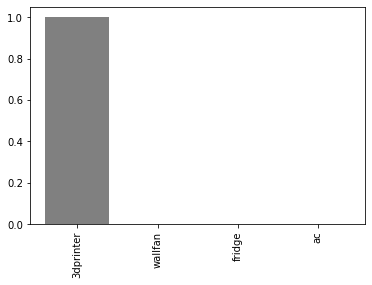

In [100]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=25)

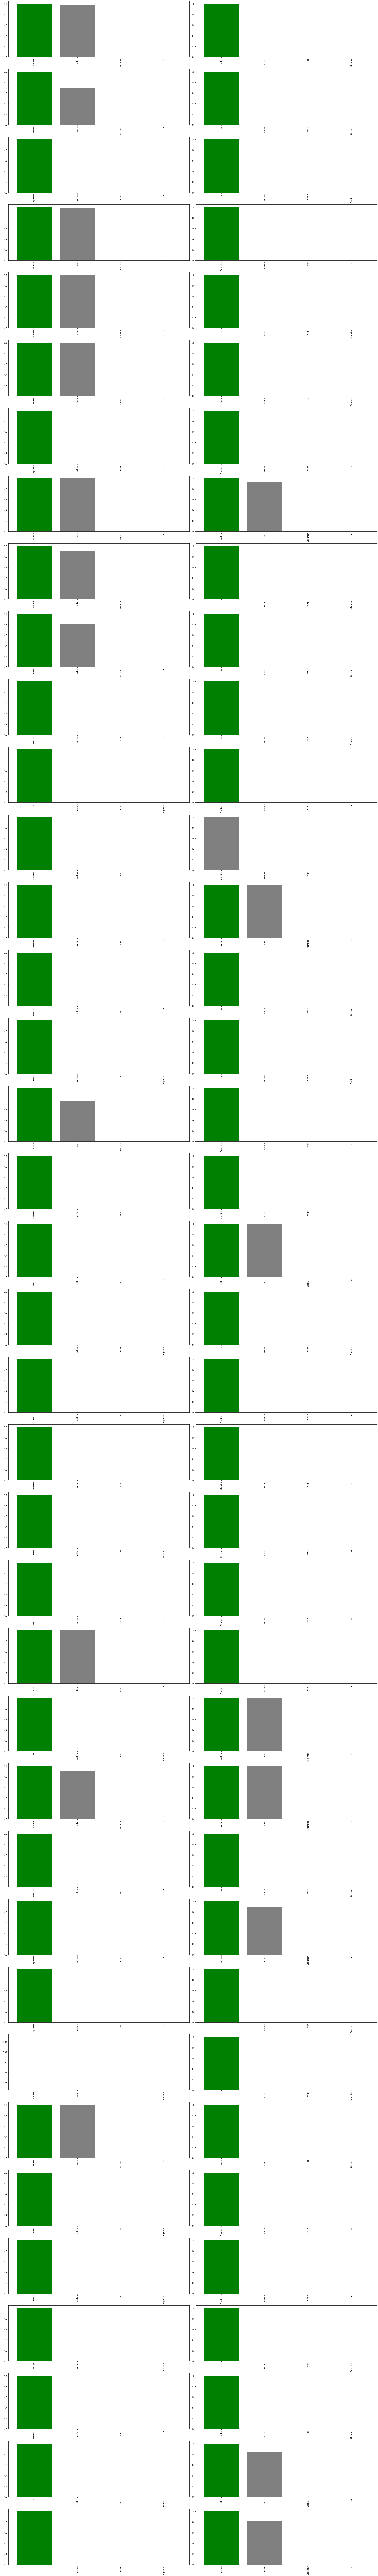

In [102]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 38
num_cols = 2
num_files = num_rows*num_cols
plt.figure(figsize=(7*2*num_cols, 5*num_rows))
for i in range(num_files):
    plt.subplot(num_rows, num_cols, i+1)
    plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [103]:
import datetime

In [104]:
def save_model(model, suffix=None):
    """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
    """
  # Create model directory with current time
    modeldir = os.path.join(".\models",
                          datetime.datetime.now().strftime("%m-%d-%Y"))
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [105]:
# Save our model trained on 400 signatures
save_model(model, suffix="400 files-Adam")

Saving model to: .\models\09-15-2020-400 files-Adam.h5...


'.\\models\\09-15-2020-400 files-Adam.h5'

In [106]:
def load_model(model_path):
    """
  Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path)
    return model

In [107]:
# Load our model trained 
model = load_model('./models/09-15-2020-400 files-Adam.h5')

Loading saved model from: ./models/09-15-2020-400 files-Adam.h5


In [109]:
# Evaluate the pre-saved model
acc = model.evaluate(val_data)

3/3 [==============================] - 0s 2ms/step - loss: 1.4763 - accuracy: 0.9737


In [110]:
acc[1]

0.9736841917037964

In [113]:
print(f'Accuracy: {acc[1]*100:.2f}%')

Accuracy: 97.37%
